In [78]:
# Import necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

import scipy.cluster.hierarchy as sch

In [79]:
data = pd.read_csv('wholesale.csv')

X = data.iloc[:, :].values

data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


# Nomer 2.a

n_clusters k-Means= 2 SSE value: 113217528878.79837 Silhouette_score: 0.5115333882980367
n_clusters k-Means= 3 SSE value: 80342167254.53633 Silhouette_score: 0.4764089086483815
n_clusters k-Means= 4 SSE value: 64855545845.901405 Silhouette_score: 0.3866313675434283
n_clusters k-Means= 5 SSE value: 52928149261.515656 Silhouette_score: 0.3832957495230123
n_clusters k-Means= 6 SSE value: 47527414534.79788 Silhouette_score: 0.33820315671708984
n_clusters k-Means= 7 SSE value: 41633142731.52025 Silhouette_score: 0.32138808859098494
n_clusters k-Means= 8 SSE value: 36094476181.932014 Silhouette_score: 0.34455549789180184
n_clusters k-Means= 9 SSE value: 32821767959.065 Silhouette_score: 0.3117746150028181


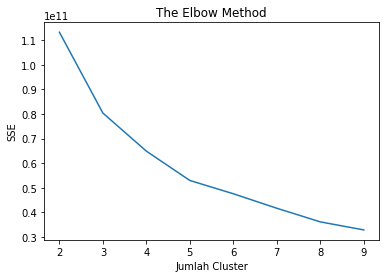

In [80]:
cluster_range = range(2, 10)

SSE = []

for k in cluster_range:
    model = KMeans(n_clusters=k)

    kmeans = model.fit(X)

    print("n_clusters k-Means=", k, "SSE value:", kmeans.inertia_,
          "Silhouette_score:", silhouette_score(X, kmeans.labels_))

    SSE.append(kmeans.inertia_)

plt.plot(cluster_range, SSE)

plt.xlabel('Jumlah Cluster')
plt.ylabel('SSE')
plt.title('The Elbow Method')

plt.show()


# Nomer 2.b

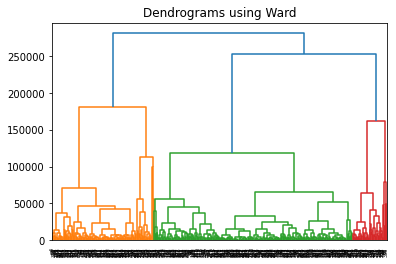

Silhouette_score: 0.3447187623823024


In [81]:
n_clusters = 2

# Hirarchical Clustering menggunakan pendekatan ward
plt.title("Dendrograms using Ward")
ward_dendogram = sch.dendrogram(sch.linkage(data, method='ward'))
plt.show()

hc_ward = AgglomerativeClustering(
    n_clusters=n_clusters, affinity='euclidean', linkage='ward')
y_hc_ward = hc_ward.fit_predict(X)

print("Silhouette_score:", silhouette_score(X, y_hc_ward))


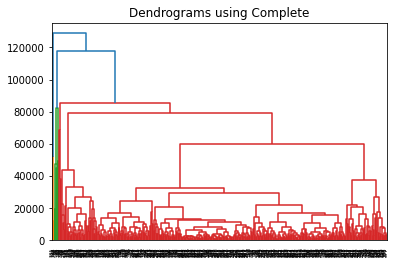

Silhouette_score: 0.7275938818770178


In [82]:
# Hirarchical Clustering menggunakan pendekatan complete link
plt.title("Dendrograms using Complete")
complete_dendogram = sch.dendrogram(sch.linkage(data, method='complete'))
plt.show()

hc_complete = AgglomerativeClustering(
    n_clusters=n_clusters, affinity='euclidean', linkage='complete')
y_hc_complete = hc_complete.fit_predict(X)

print("Silhouette_score:", silhouette_score(X, y_hc_complete))


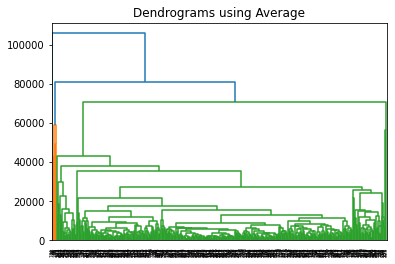

Silhouette_score: 0.7957467756794632


In [83]:
# Hirarchical Clustering menggunakan pendekatan average link
plt.title("Dendrograms using Average")
average_dendogram = sch.dendrogram(sch.linkage(data, method='average'))
plt.show()

hc_average = AgglomerativeClustering(
    n_clusters=n_clusters, affinity='euclidean', linkage='average')
y_hc_average = hc_average.fit_predict(X)

print("Silhouette_score:", silhouette_score(X, y_hc_average))


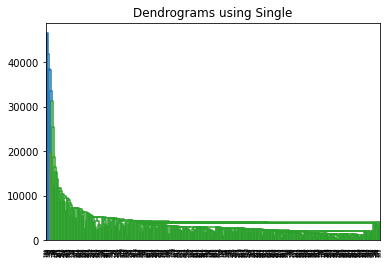

Silhouette_score: 0.7957467756794632


In [84]:
# Hirarchical Clustering menggunakan pendekatan single link
plt.title("Dendrograms using Single")
single_dendogram = sch.dendrogram(sch.linkage(data, method='single'))
plt.show()

hc_single = AgglomerativeClustering(
    n_clusters=n_clusters, affinity='euclidean', linkage='single')
y_hc_single = hc_single.fit_predict(X)

print("Silhouette_score:", silhouette_score(X, y_hc_single))


# Nomer 2.c

Dari hasil clustering pada poin 2a menggunakan kMeans, didapatkan hasil clustering paling maksimal adalah saat k=2 yaitu menghasilkan nilai silhouette score 0.5115333882980367.

Sedangkan pada poin 2b dengan menggunakna Hirarchical Clustering didapatkan hasil paling baik adalah saat menggunakan pendekatan average link dan single link yang menghasilkan silhouette score yang sama yaitu 0.7957467756794632.

Dari hasil perbandingan silhouette score ini, didapatnya bahwa algoritma hirarchical clustering lebih unggul daripada kMeans.